<a href="https://colab.research.google.com/github/lauracline/Statistical-Learning-Cookbooks/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Previously we discussed real-valued response variables (regression problems). This chapter will discuss qualitative (categorical) variables (classification problems). Classification problems can be thought of as regression problems since most of the models return a probability of being a certain class. Since probabilities take on real values the problem can also be called regression - as in logistic regression - a machine learning technique that is used for classification but returns probabilities of real values. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Default.csv"
default = pd.read_csv(url)

In [3]:
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-100.0, 2500.0)

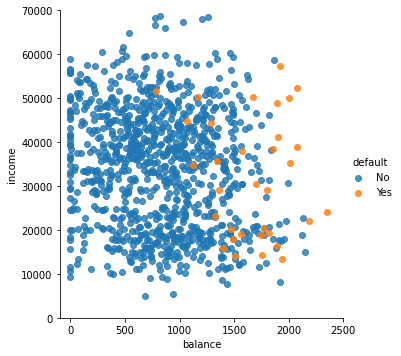

In [4]:
sns.lmplot('balance', 'income', data=default.sample(1000), hue='default', fit_reg=False)
plt.ylim([0,70000])
plt.xlim([-100,2500])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


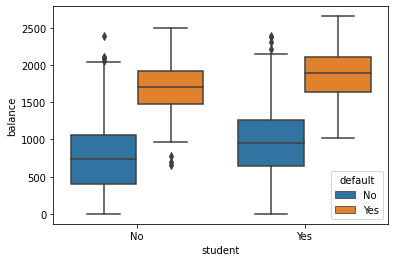

In [5]:
#evidence that
sns.boxplot('student', 'balance', data=default, hue="default")

## **Why Not Linear Regression**

Though it is always possible to use numeric values for the categories of the response, there is generally no natural way to order and seperate the values in a way that makes sense. Only in a two-category problem will the ordering make sense but even then linear regression will produce probability estimates outside of [0,1].

In [6]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# Make column for Yes default
default['Yes'] = (default['default'] == 'Yes').astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


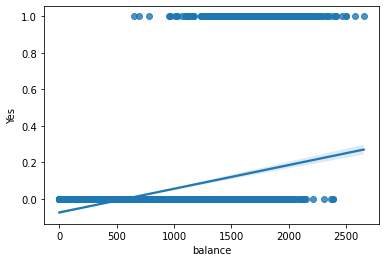

In [8]:
# Linear regression model for default
# Not idea and could be made better by simply making all probabilities
# > 1 equal to 1
sns.regplot('balance', 'Yes', data=default)

# **Logistic Regression**

Find function that always outputs number between 0 and 1. Many functions satisfy this condition. For logistic regression the logistic function is used. 

$y = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$

Many times you will see this as the sigmoid function in a simpler format

$y = \frac{1}{1 + e^{-1}}$

Where *t* is the normal linear model given some value X since it will always be between 0 and 1. Some more algebra shows that

$log\frac{p(X)}{1 - p(X)} = \beta_0 + \beta_1X$

Where *y* has been replaced by *p(X)*, the probability of X. The expression $\frac{p(X)}{1 - p(X)}$ is known as the 'odds'. So for instance if you were gambling and think that the Liberals will get a Majority 80% of the time. The odds would be .8/.2 = 4 or said "4 to 1". For every 4 times the Liberals get the Majority, the Conservatives will get the majority once. 

What logistic regression is saying, that the log odds are modeled by a linear model which can be solved by linear regression. That has the literal meaning of - given a one unit increase in one of the variables (say $X_1$), a $\beta_1$ increase will occur in the log-odds. Or equivalently, the odds will be multiplied by $e^{\beta_1}$.

In our election example, $X_1$ could be the percentage of voters under 30 and $\beta_1$ could be .5. That would mean if $X_1$ were to increase by 1 percentage point, the Liberals log odds would increase by .5. In our example above, the Liberal's log odds would go from 4 to 4.5 and their probability of winning would go from 80% to 4.5 / 5.5 or 82%. 

There is no straight line relationship between the probability of a certain class and X in logisitc regression because of the need to have probabilities between 0 and 1. 

## **Estimating Coefficients Through Maximum Likelihood**

In linear regression, the model coefficients were found by minimizing the squared residuals. In logistic regression, we maximize the probabiltiies of all points by a method called maximum likelihood. Maximum likelihood multiplies the model probability for each observation together and chooses parameters that maximize this number. The log likelihood is actually used as numerical underflow will be a problem for most problems with a non-trivial amount of data. 

In [9]:
# Think about doing a maximum likelihood example using 4 coin tosses 
# and 3 heads. Start with .5 then choose .6 and see the differences

results = smf.logit('Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                  0.4534
Time:                        13:07:11   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


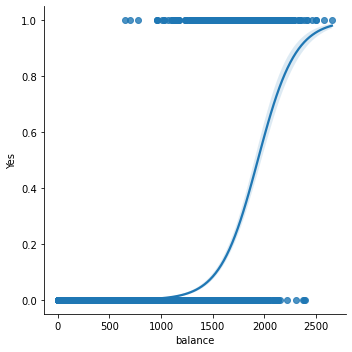

In [11]:
# Looks quite a bit different than the linear regression model
sns.lmplot('balance', 'Yes', data=default, logistic=True)

For every one dollar increase in balance the log odds increases by 0.0555. The log odds when there is no balance is -10.6. 

In [12]:
# p / (1 - p) = 
odds = np.exp(-10.65)
odds

2.3700841597751968e-05

In [13]:
# (1 - p) / p = 1 / odds 
one_over_odds = 1 / odds

In [14]:
# 1/p = one_over_odds + 1 
one_over_p = one_over_odds + 1

In [15]:
# p = 1 / one_over_p

In [16]:
# Since p is so close to 0, p / (1 - p) is nearly equivalent to p
p = 1 / one_over_p
p

2.370027988117268e-05

### **Scikit-learn for Easier Prediction** 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# This actually uses regularization by default which will be 
# covered in later chapters
lr = LogisticRegression()

In [19]:
X = np.column_stack((np.ones(len(default)), default['balance']))

In [20]:
lr.fit(X, default['Yes'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Model coefficients are different by B1 is very similiar
lr.coef_

array([[-5.16481986,  0.00530575]])

In [22]:
# Predict 1000 dollar balance default
lr.predict_proba([[1,1000]]) # 99 percent chance no default

array([[0.99346413, 0.00653587]])

In [23]:
# Predict 2000 dollar balance default
lr.predict_proba([[1,2000]]) # 57 percent chance default

array([[0.42999758, 0.57000242]])

In [24]:
# Predict 3000 dollar balance default
lr.predict_proba([[1,3000]]) # >99 percent chance default 

array([[0.00372998, 0.99627002]])

## **Multiple Linear Regression** 

More than one predictor

In [25]:
results = smf.logit('Yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                  0.4619
Time:                        13:07:48   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### **Simpsons Paradox**

In [27]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                0.004097
Time:                        13:07:48   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

The first model above with both balance and student show a negative relationship between student and default - meaning that being a student decreases the likelihood of defaulting. The second model shows the opposite, that being a student increases the chance of defaulting. This can be explained by the fact that students have more debt on average but compared with those with the same amount of debt they are less likely to default. 

## **Multiclass Logistic Regression**

A simple method when you have k classes where k > 2 is to create k-1 independent logisitc regression classifiers by choosing the response variable to be binary, 1 when in the current class else 0. 

# **Linear Discriminant Analysis** 

Not to be confused with latent dirichlet allocation. Used for multiclass classification problems. LDA assumes all predictor variables come from a gaussian distribution and estimates the mean and variance for each predictor variable where the variance is the same across each predictor variable. It also estimates the prior probability simply by using the proportion of classes in the training set. 

Bayes rule is used to compute a probability for each class. When there is more than one predictor, a multivariate gaussian is used. Correlations between each predictor must be estimated (the covariance matrix) as they are a parameter to the multivariate gaussian.

## **Stock Market Prediction Lab**

In [28]:
url = "https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Smarket.csv"
smarket = pd.read_csv(url)
smarket.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [29]:
smarket['Up'] = np.where(smarket['Direction'] == 'Up', 1, 0)

In [30]:
smarket.corr()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Up
Unnamed: 0,1.000000,0.979773,0.035415,0.036022,0.038989,0.041437,0.035025,0.546348,0.035273,0.081433
Year,0.979773,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.035415,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.036022,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.038989,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.041437,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.035025,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.546348,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.035273,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Up,0.081433,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [31]:
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values
y = smarket['Up'].values

In [32]:
train_bool = smarket['Year'].values < 2005
X_train = X[train_bool]
X_test = X[~train_bool]
y_train = y[train_bool]
y_test = y[~train_bool]

In [33]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                0.001651
Time:                        13:08:18   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# True on the left axis, predicted above
confusion_matrix(y_test, lr.predict(X_test))

array([[ 37,  74],
       [ 30, 111]])

In [37]:
147 / len(y_test)

0.5833333333333334

Out of the 67 predicted down, 37 actually were down. 54% accuracy. 
Out of the 185 predicted up, 111 actually were up. 60% accuracy. 

58% total accuracy. 

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred[y_test == 1]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [41]:
lda = LinearDiscriminantAnalysis()

In [42]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [43]:
# Almost exact same as logisitic regression
confusion_matrix(y_test, lda.predict(X_test))

array([[ 37,  74],
       [ 30, 111]])

In [44]:
lda.priors_

array([0.49198397, 0.50801603])

In [45]:
# Use QDA with only 2 variables
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[:,:2], y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [46]:
# Almost exact same as logistic regression
confusion_matrix(y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]])

In [47]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)

In [49]:
knn.fit(X_train[:,:2], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[48, 63],
       [55, 86]])

In [51]:
X_test[:,:2]

array([[-1.340e-01,  8.000e-03],
       [-8.120e-01, -1.340e-01],
       [-1.167e+00, -8.120e-01],
       [-3.630e-01, -1.167e+00],
       [ 3.510e-01, -3.630e-01],
       [-1.430e-01,  3.510e-01],
       [ 3.420e-01, -1.430e-01],
       [-6.100e-01,  3.420e-01],
       [ 3.980e-01, -6.100e-01],
       [-8.630e-01,  3.980e-01],
       [ 6.000e-01, -8.630e-01],
       [ 9.670e-01,  6.000e-01],
       [-9.490e-01,  9.670e-01],
       [-7.780e-01, -9.490e-01],
       [-6.410e-01, -7.780e-01],
       [-3.530e-01, -6.410e-01],
       [ 4.000e-01, -3.530e-01],
       [ 4.840e-01,  4.000e-01],
       [ 4.100e-02,  4.840e-01],
       [-2.720e-01,  4.100e-02],
       [ 8.460e-01, -2.720e-01],
       [ 6.890e-01,  8.460e-01],
       [ 3.180e-01,  6.890e-01],
       [-2.770e-01,  3.180e-01],
       [ 1.104e+00, -2.770e-01],
       [-1.090e-01,  1.104e+00],
       [ 4.800e-02, -1.090e-01],
       [-8.580e-01,  4.800e-02],
       [ 4.210e-01, -8.580e-01],
       [ 6.930e-01,  4.210e-01],
       [ 7

# **Applied Questions**

## **Question 10**

In [52]:
url = "https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Weekly.csv"
weekly = pd.read_csv(url)
weekly.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [53]:
# Strongest correlations with today are lag1 and lag3
weekly.corr()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Unnamed: 0,1.000000,0.998863,-0.031577,-0.033129,-0.030420,-0.030935,-0.030382,0.842095,-0.031183
Year,0.998863,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.031577,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033129,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030420,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.030935,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030382,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.842095,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.031183,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [54]:
today = weekly['Today']

In [55]:
today_perc = (100 + today) / 100

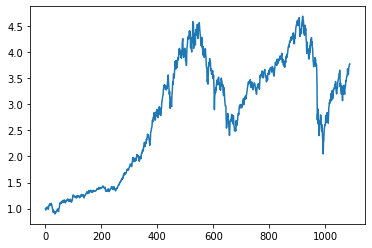

In [56]:
today_perc.cumprod().plot()

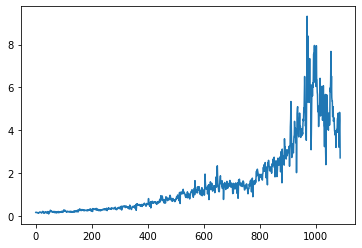

In [57]:
weekly['Volume'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


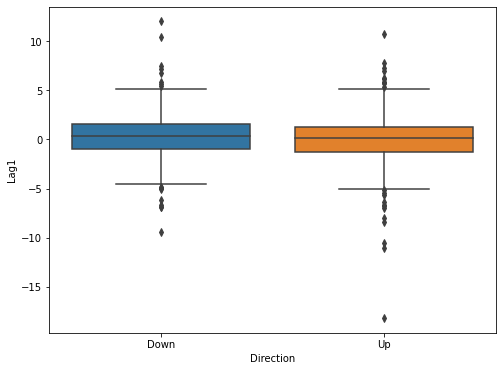

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot('Direction', 'Lag1', data=weekly)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


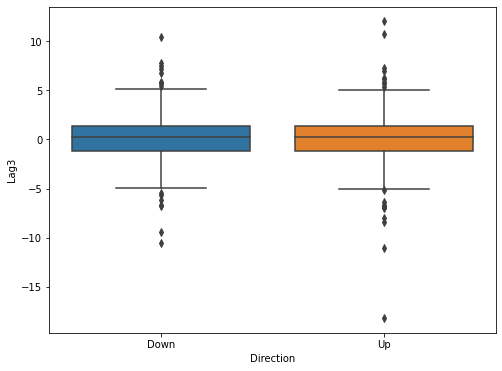

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot('Direction', 'Lag3', data=weekly)

In [60]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [61]:
# Wow Lag2 is statistically significant 
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                0.006580
Time:                        13:09:47   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [62]:
results = smf.logit('Direction ~ Lag2', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                0.003866
Time:                        13:09:47   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

In [63]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)

In [64]:
confusion_matrix(weekly['Direction'], predictions)

array([[ 33, 451],
       [ 26, 579]])

In [65]:
451/1030

0.43786407766990293

In [66]:
weekly['Direction'].mean()

0.5555555555555556

The default prediction is Up - about 95% of the predictions are up and it actually gets 56.2% correct but that's only slightly higher than the 55.6% total up days. 

In [67]:
# Use sklearn for the rest of the problems 
year_bool = weekly['Year'] < 2009
weekly['ones'] = 1
X_train = weekly[year_bool][['ones', 'Lag2']].values
X_test = weekly[~year_bool][['ones', 'Lag2']].values
y_train = weekly[year_bool]['Direction'].values
y_test = weekly[~year_bool]['Direction'].values

In [68]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
confusion_matrix(y_test, lr.predict(X_test))

array([[ 9, 34],
       [ 5, 56]])

In [70]:
# Use LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

array([[ 9, 34],
       [ 5, 56]])

In [71]:
# Use QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([[43,  0],
       [61,  0]])

In [72]:
# Use KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[21, 22],
       [31, 30]])

## **Question 11**

In [73]:
url = "https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Auto.csv"
auto = pd.read_csv(url)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [74]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)

In [75]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698,0.838239
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,0.322629
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,0.511393
mpg01,0.838239,-0.740327,-0.738607,-0.745734,0.322629,0.454108,0.511393,1.000000


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [77]:
X = auto[['cylinders', 'origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [78]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.89

In [79]:
X = auto[['cylinders', 'origin', 'year', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [80]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.9

In [81]:
X = auto[['cylinders', 'origin', 'year', 'acceleration', 'weight']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr=LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.89

In [82]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.92

In [83]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.89

In [84]:
# Looks like K=8 yeilds the best results 

for k in range (1,51):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  accuracy = accuracy_score(y_test, knn.predict(X_test))
  print('With K={} accuracy is {:.3f}'.format(k, accuracy))

With K=1 accuracy is 0.860
With K=2 accuracy is 0.830
With K=3 accuracy is 0.880
With K=4 accuracy is 0.860
With K=5 accuracy is 0.880
With K=6 accuracy is 0.900
With K=7 accuracy is 0.890
With K=8 accuracy is 0.900
With K=9 accuracy is 0.890
With K=10 accuracy is 0.890
With K=11 accuracy is 0.890
With K=12 accuracy is 0.890
With K=13 accuracy is 0.880
With K=14 accuracy is 0.880
With K=15 accuracy is 0.880
With K=16 accuracy is 0.880
With K=17 accuracy is 0.880
With K=18 accuracy is 0.880
With K=19 accuracy is 0.890
With K=20 accuracy is 0.900
With K=21 accuracy is 0.890
With K=22 accuracy is 0.890
With K=23 accuracy is 0.890
With K=24 accuracy is 0.890
With K=25 accuracy is 0.890
With K=26 accuracy is 0.890
With K=27 accuracy is 0.880
With K=28 accuracy is 0.890
With K=29 accuracy is 0.880
With K=30 accuracy is 0.890
With K=31 accuracy is 0.880
With K=32 accuracy is 0.890
With K=33 accuracy is 0.890
With K=34 accuracy is 0.890
With K=35 accuracy is 0.890
With K=36 accuracy is 0.890
W

## **Question 13**

In [85]:
url = "https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Boston.csv"
boston = pd.read_csv(url)
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [86]:
X = boston.iloc[:,2:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [87]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.905511811023622

In [88]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.8740157480314961

In [89]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8503937007874016